In [17]:
import matplotlib
from matplotlib.ticker import FixedLocator, LogFormatter
from core.util import matplotlib_setting, read_row, read_column, lin_regression, format_with_error, intersect_parabula
from core.fit import fit_poly, fit_exp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

matplotlib_setting()
file_path = "./../data/brue.xlsx"  # Replace with your file path
df = pd.read_excel(file_path, 'part_3', header=None)
voltage10 = read_column(df, column=0, start_row=0, end_row=7).astype(float)
voltage30 = read_column(df, column=2, start_row=0, end_row=7).astype(float)
voltage200 = read_column(df, column=4, start_row=0, end_row=7).astype(float)


rev10 = read_column(df, column=1, start_row=0, end_row=7)
res10 = (rev10 / (10-rev10))*10
rev30 = read_column(df, column=3, start_row=0, end_row=7)
res30 = (rev30 / (10-rev30))*30
rev200 = read_column(df, column=5, start_row=0, end_row=7)
res200 = (rev200 / (10-rev200))*200
res100 = np.array([(1.92 / (10-1.92))*100])
df.head()


,0,1,2,3,4,5,6,7
0,1.01,8.28,1.01,5.85,1.01,0.78,NaN,NaN
1,2,8.69,2.01,6.7,2,1.16,NaN,NaN
2,3,8.88,2.99,7.12,3,1.56,NaN,NaN
3,4,9,4.01,7.39,4,1.86,NaN,NaN
4,4.98,9.08,5.00,7.57,5.05,2.12,NaN,NaN


In [18]:

i10 = (voltage10/(10+res10))
i30 = (voltage30/(30+res30))
i200 = (voltage200/(200+res200))
i100 = (1.01/(100+res100))

p10 = voltage10*i10*(res10/(10+res10))*1000
p30 = voltage30*i30*(res30/(30+res30))*1000
p100 = (1.01*i100*(res100/(100+res100)))*1000
p200 = voltage200*i200*(res200/(200+res200))*1000

resArr = np.concat((res10, res30, res100, res200)).astype(np.float64)
iArr = np.concat((i10, i30, i100, i200)).astype(np.float64)
pArr = np.concat((p10, p30,p100, p200)).astype(np.float64)


[ 48.13953488  66.33587786  79.28571429  90.          98.69565217
 107.64705882  42.28915663  60.90909091  74.16666667  84.94252874
  93.45679012 101.57894737  23.76237624  16.9197397   26.24434389
  36.96682464  45.7002457   53.8071066   60.41666667]
[0.017372   0.0262     0.0336     0.04       0.045816   0.050915
 0.01397167 0.02211    0.028704   0.034887   0.0405     0.0456
 0.0081608  0.0046561  0.00884    0.01266    0.01628    0.019897
 0.0231936 ]
[ 48.13953488  66.33587786  79.28571429  90.          98.69565217
 107.64705882  42.28915663  60.90909091  74.16666667  84.94252874
  93.45679012 101.57894737  23.76237624  16.9197397   26.24434389
  36.96682464  45.7002457   53.8071066   60.41666667]
[ 14.52785616  45.5356      89.5104     144.         207.17262144
 279.05747775   8.25515925  29.775537    61.10737152 103.38378693
 153.2925     211.2192       1.58254234   0.36680756   2.05088
   5.92488     12.11232     21.3017282   32.50072781]


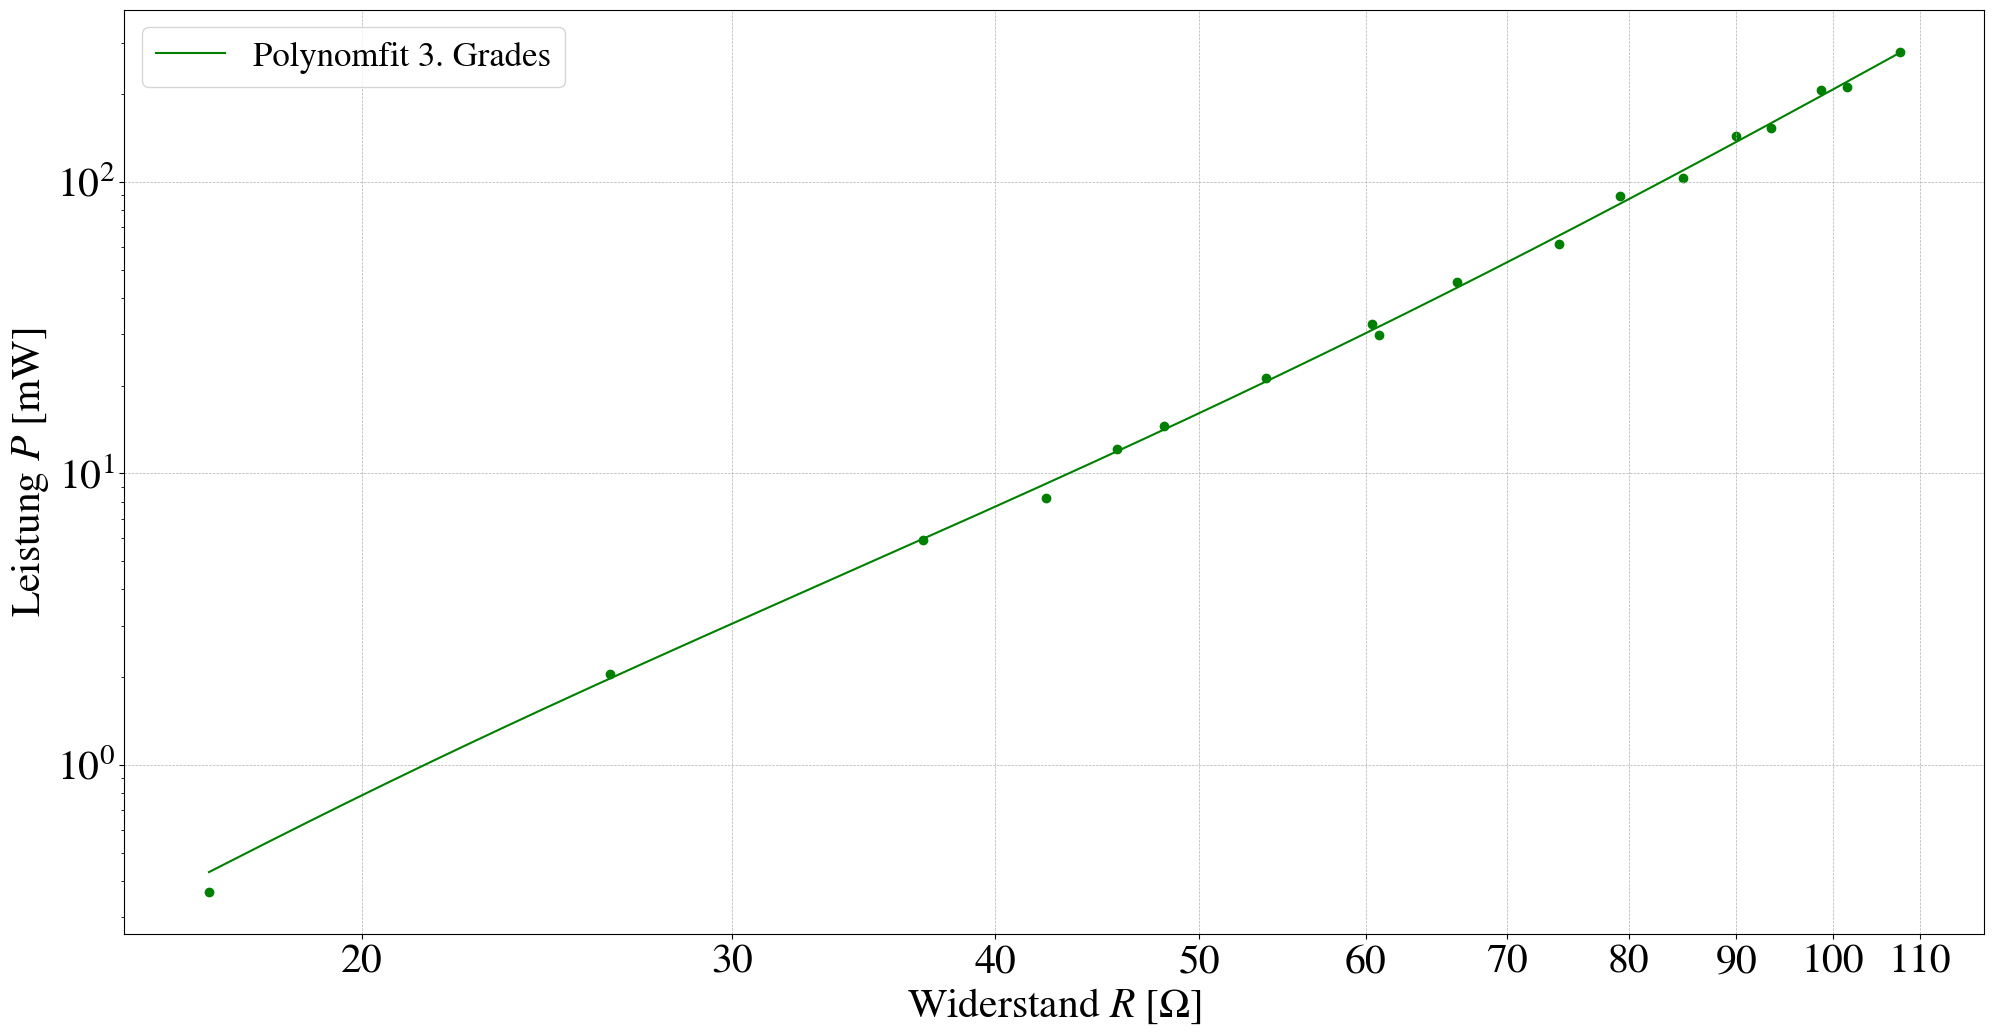

In [19]:


i_fit = fit_poly(resArr, iArr, 3)
p_fit = fit_poly(resArr, pArr, 4)

#paramsP, covP = np.polyfit(p10, res10, 1, cov=True)

#print(np.sqrt(cov[0,0] + total_err**2))
#print(np.sqrt(cov[0,0]))
#print(slope, np.sqrt(cov[0,0]))
#print(vars)
#r_fit = np.linspace(res10.min(), res10.max(), 1000)
#p10_fit = sinus(t_fit, *params1)

#plt.plot(res10, slope10 * r_fit + intercept10, color="red"
         #, label=r"Regressionsgerade $\mu="+'{0:.3f}'.format(slope/9.807)+"("+'{:2.0f}'.format(np.sqrt(cov[0,0] + total_err**2)/9.807*1e3)+")"+r" \mathrm{[\frac{m}{s}]}$"
         #)
plt.xscale('log')
plt.yscale('log')
plt.scatter(res10, p10, marker="o", color="green")
plt.scatter(res30,p30, marker="o", color="green",)
plt.scatter(res200, p200, marker="o", color="green",)
plt.xlabel(r"Widerstand $R\ \mathrm{[Ω]}$")
plt.ylabel(r"Leistung $P\ \mathrm{[mW]}$")

x_ticks = np.arange(10, 121, 10)  # 10, 20, 30 ... 120
plt.xticks(x_ticks, labels=x_ticks)  # force tick labels
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

plt.plot(p_fit.x_fit, p_fit.y_fit, color="green", label="Polynomfit 3. Grades")



#plt.title(label="Extrapolation der Regressionsgerade")

plt.legend(prop={'size': 25})
plt.savefig('figures/pr-diagram.pdf')
plt.show()

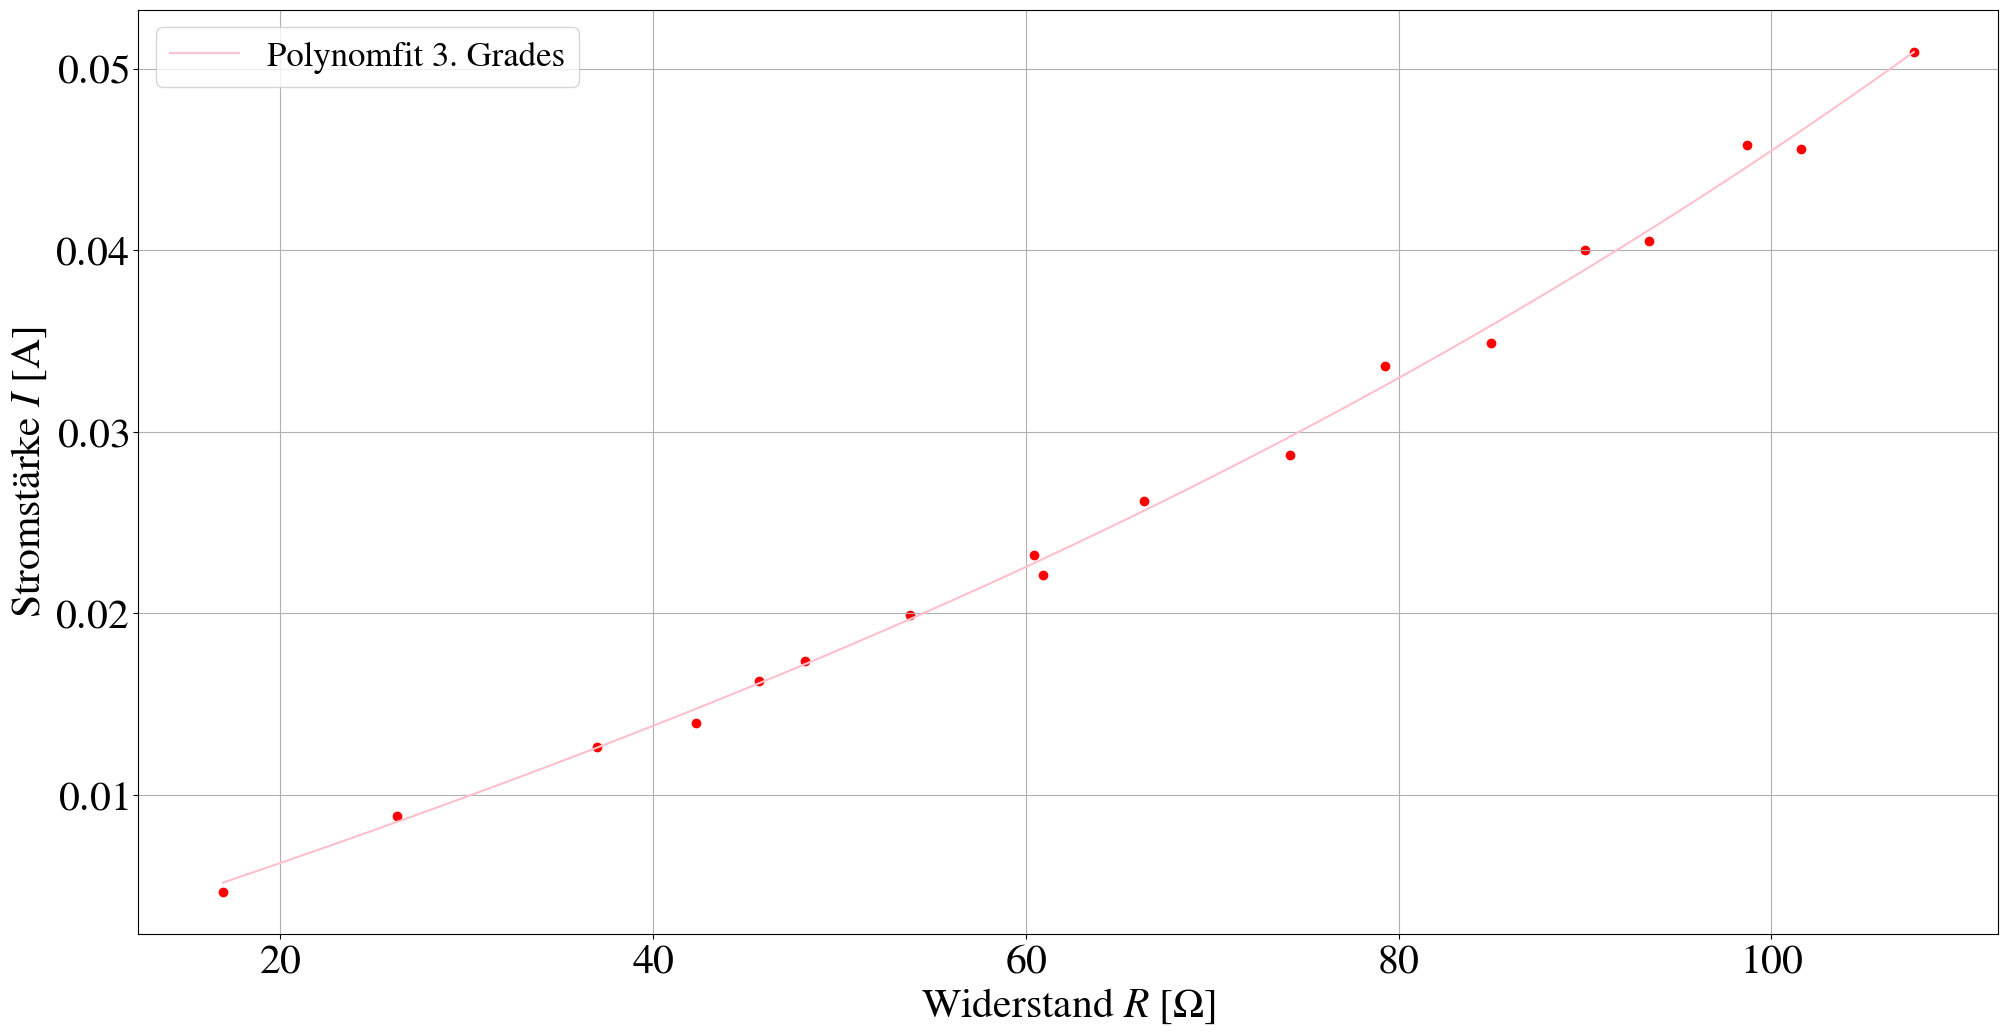

In [20]:
plt.scatter(res10, i10, marker="o", color="red")
plt.scatter( res30,i30, marker="o", color="red")
plt.scatter( res200,i200, marker="o", color="red")
plt.xlabel(r"Widerstand $R\ \mathrm{[Ω]}$")
plt.ylabel(r"Stromstärke $I\ \mathrm{[A]}$")
plt.plot(i_fit.x_fit, i_fit.y_fit, color="pink", label="Polynomfit 3. Grades")
#plt.axis([-0.01, 0.55, 50, 75])
#plt.xticks(np.arange(0, 0.52, 0.05))  # X-Achse mit Schrittweite 0.05
#plt.yticks(np.arange(50, 75 + 2.5, 2.5))

#plt.title(label="Extrapolation der Regressionsgerade")

plt.legend(prop={'size': 25})
plt.grid()
plt.savefig('figures/ir-diagram.pdf')
plt.show()